In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Datetime objects in Python, Numpy, and Pandas

#### Native Python dates and times

In [2]:
# Python: datetime module
from datetime import datetime

d = datetime(year=2021, month=6, day=30)
d

datetime.datetime(2021, 6, 30, 0, 0)

In [3]:
# Once you have a dattime object, you can do things like printing the day of the week:

d.strftime('%B')

'June'

#### Numpy native time series dtype

In [4]:
date = np.array('2015-07-14', dtype=np.datetime64)
date

array('2015-07-14', dtype='datetime64[D]')

In [6]:
# Now we can quickly do vectorized operations on it!

date + np.arange(1,5)

array(['2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18'],
      dtype='datetime64[D]')

In [8]:
# https://numpy.org/doc/stable/reference/arrays.datetime.html
np.datetime64('2015-07-04 12:59:59')

numpy.datetime64('2015-07-04T12:59:59')

#### Pandas time series data type:
* Timestamp
* DatetimeIndex' - Datetime object as Index

In [9]:
t = pd.Timestamp('2021-06-30, 07:50:15')
t

Timestamp('2021-06-30 07:50:15')

In [11]:
# Can pandas read these dates?

dates = pd.to_datetime([datetime(2015,7,3), '4th of July, 2015', '2015-Jul-06', '07-07-2016', '20150708'])

dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2016-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [12]:
# We can use various attributes of datetime object to figure out day, month, year, weekday et
t.quarter

2

In [14]:
# weekday?

t.weekday()
t.day_name()

'Wednesday'

Timestamp documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

### Demo: Working with Timeseries data in pandas

In [16]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head(10)


,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
5,2020-03-13 08-PM,ETHUSD,124.85,1940673.93
6,2020-03-13 08-AM,ETHUSD,128.39,6808571.23
7,2020-03-13 07-PM,ETHUSD,134.03,7579741.09
8,2020-03-13 07-AM,ETHUSD,131.35,5255468.75
9,2020-03-13 06-PM,ETHUSD,128.93,4898735.81


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [18]:
# check for nulls
df.isnull().sum()

Date      0
Symbol    0
Close     0
Volume    0
dtype: int64

In [ ]:
# If you run this code it will try to plot everything and will take forever.
#plt.plot(df.Date, df.Close)

<AxesSubplot:>

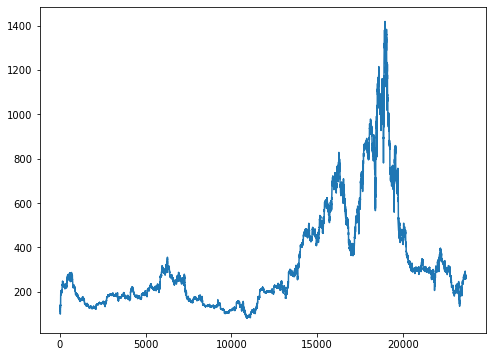

In [20]:
# use Pandas .plot()

df.Close.plot()

### Time series analysis: How to make pandas time-aware and leverage inbuild functionality:
1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime()).
2. Set the datetime column as Index.
3. Sort the datetime index.

In [21]:
# Pandas to_datetime method can convert strings/object to datetime object (aka Timestamp object).
# Most of time pandas is smart enough to parse the date without any help.

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [22]:
# Can Pandas read this datetime string?
pd.to_datetime('2020-03-13 08-PM')

ParserError: Unknown string format: 2020-03-13 08-PM

In [24]:
# Sometimes we have to specify the format of the datetime string to help Pandas parse the date/time)
pd.to_datetime('2020-03-13 08-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 20:00:00')

In [25]:
df.head()

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44


In [26]:
# Step 1: Let's convert the 'Date' column in our df to Pandas datetime object using pd.to_datetime()

df.Date = pd.to_datetime(df.Date, format = '%Y-%m-%d %I-%p')

In [27]:
# Confirm if the 'Date' column is indeed a datetime object now

df.Date

0       2020-03-13 12:00:00
1       2020-03-13 00:00:00
2       2020-03-13 11:00:00
3       2020-03-13 10:00:00
4       2020-03-13 09:00:00
                ...        
23669   2017-07-01 17:00:00
23670   2017-07-01 16:00:00
23671   2017-07-01 15:00:00
23672   2017-07-01 14:00:00
23673   2017-07-01 13:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [28]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

df = df.set_index('Date').sort_index()

In [29]:
df.head(5)

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [30]:
# What is the Index type now?
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

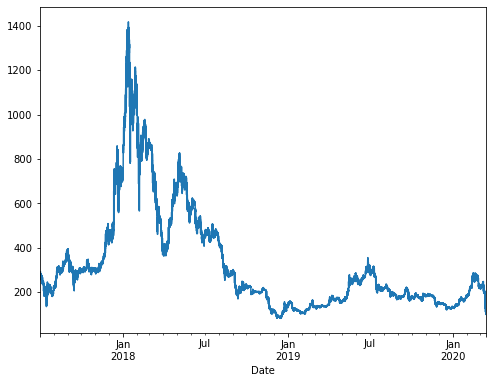

In [31]:
# let's plot the closing price again and see how it compares to previous plot

df.Close.plot()

In [32]:
# Add a new column called 'day' which is the 'weekday'

df['day'] = df.index.day_name()

In [33]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


<AxesSubplot:xlabel='day'>

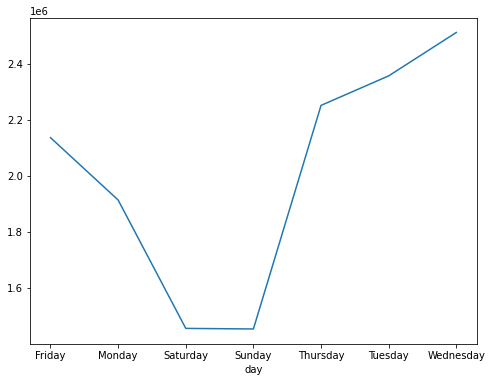

In [34]:
# Can I use groupby to see mean trading volume by day?

df.groupby('day').mean().Volume.plot()

## How to choose subset of a dataframe?

In [35]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [36]:
df.loc['2017-07-01 11:00:00']

Symbol      ETHUSD
Close       257.13
Volume   679358.87
day       Saturday
Name: 2017-07-01 11:00:00, dtype: object

In [37]:
# Turn the argument into something Pandas interprets as a range
df['2017': '2018']

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2018-12-31 19:00:00,ETHUSD,135.41,3380282.07,Monday
2018-12-31 20:00:00,ETHUSD,135.99,1775465.69,Monday
2018-12-31 21:00:00,ETHUSD,135.01,1079617.65,Monday


In [38]:
# Choose rows for '2017-07-01' (show only first 10 values)

df['2017-07-01'][:10]

/var/folders/jl/s3ptdwdx55v01d2g2wrs7vdc0000gn/T/ipykernel_6510/816792628.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-07-01'][:10]


,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35,Saturday
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00,Saturday


In [39]:
# We can also use date range like this

df['2018-02-01':'2018-02-02'].head(10)

,Symbol,Close,Volume,day
Date,,,,
2018-02-01 00:00:00,ETHUSD,998.00,10842844.20,Thursday
2018-02-01 01:00:00,ETHUSD,1110.45,6160097.38,Thursday
2018-02-01 02:00:00,ETHUSD,1138.68,9858134.59,Thursday
2018-02-01 03:00:00,ETHUSD,1130.00,14240568.70,Thursday
2018-02-01 04:00:00,ETHUSD,1130.00,6016977.66,Thursday
2018-02-01 05:00:00,ETHUSD,1100.99,0.00,Thursday
2018-02-01 06:00:00,ETHUSD,1075.00,0.00,Thursday
2018-02-01 07:00:00,ETHUSD,1113.99,0.00,Thursday
2018-02-01 08:00:00,ETHUSD,1103.47,9650043.46,Thursday


### Changing the Period
* Upsampling - increasing frequency
    * This will result in empty observations which you may choose to fill with .ffill(), .bfill(), or some other method e.g. mean, median ...
* Downsampling - reducing frequency

In [40]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [41]:
# Upsample using asfreq() method

# How can we take care of new NaN introduced in our data by asfreq method?

df.asfreq('45Min', method = 'ffill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:30:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:15:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:30:00,ETHUSD,128.93,4898735.81,Friday


In [42]:
# how can we backfill the data:

df.asfreq('45Min', method = 'bfill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 12:30:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 13:15:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,128.93,4898735.81,Friday
2020-03-13 18:30:00,ETHUSD,134.03,7579741.09,Friday


In [43]:
# Upsample, What if I don't want to use bfill or ffill?

df.asfreq('45Min', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,NaN,NaN,NaN,NaN
2017-07-01 12:30:00,NaN,NaN,NaN,NaN
2017-07-01 13:15:00,NaN,NaN,NaN,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,NaN,NaN,NaN,NaN
2020-03-13 18:30:00,NaN,NaN,NaN,NaN


In [44]:
# You can also do use fillna to fill Nans with certain chosen value:

df.asfreq('45Min').fillna(0)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,0,0.00,0.00,0
2017-07-01 12:30:00,0,0.00,0.00,0
2017-07-01 13:15:00,0,0.00,0.00,0
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,0,0.00,0.00,0
2020-03-13 18:30:00,0,0.00,0.00,0


When to use 'ffill' or 'bfill' or None?
* Use 'ffill' when you want to use "past data" to populate missing values.
    * When recording the velocity of an object with a constant acceleration.
* Use 'bfill' when you want to use "future data" to populate missing values.
* Use None when you want to see where missing data is.

### How can we go from more frequent to less frequent (Downsample)

In [45]:
# We can use .asfreq method. Here we go from data every hour to every 3 hours.

# Downsample

# Show only first 10 values:

df.asfreq('3H')[:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 20:00:00,ETHUSD,259.50,2366698.50,Saturday
2017-07-01 23:00:00,ETHUSD,263.84,1902503.11,Saturday
2017-07-02 02:00:00,ETHUSD,257.02,1335138.27,Sunday
2017-07-02 05:00:00,ETHUSD,274.00,1746145.00,Sunday
2017-07-02 08:00:00,ETHUSD,263.53,2863655.38,Sunday
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday


In [46]:
# Selecting data based on daily frequency:

df.asfreq('D')[:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday
2017-07-03 11:00:00,ETHUSD,279.50,1218731.52,Monday
2017-07-04 11:00:00,ETHUSD,269.57,391696.83,Tuesday
2017-07-05 11:00:00,ETHUSD,265.20,1110376.59,Wednesday
2017-07-06 11:00:00,ETHUSD,264.27,731636.01,Thursday
2017-07-07 11:00:00,ETHUSD,246.15,1103959.23,Friday
2017-07-08 11:00:00,ETHUSD,242.61,558833.41,Saturday
2017-07-09 11:00:00,ETHUSD,243.01,249725.78,Sunday


### What does the code above do to your dataframe content and size?

## Resampling
* ### Fundamentally data aggregation (similar to groupby but for dates)
    * ### as opposed to afreq which is more of a 'data selection'
* ### Only works on dataframes with a datetime index

In [47]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [48]:
# Resample the whole dataframe every hour using mean as an aggregator.

df.resample('D').mean()

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
...,...,...
2020-03-09,200.82,3804751.53
2020-03-10,201.58,1553063.15
2020-03-11,195.91,1894867.73


In [49]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [50]:
# Resample monthly and use mean for aggregation

df.resample('M').mean().head()

,Close,Volume
Date,,
2017-07-31,220.01,2480603.27
2017-08-31,298.51,2056355.72
2017-09-30,298.52,2331871.43
2017-10-31,305.65,1096152.84
2017-11-30,355.65,2741743.75


In [51]:
# Resample yearly
df.resample('Y').mean().head()

,Close,Volume
Date,,
2017-12-31,351.97,2948844.73
2018-12-31,480.93,2733347.11
2019-12-31,180.75,936000.88
2020-12-31,197.57,1415723.35


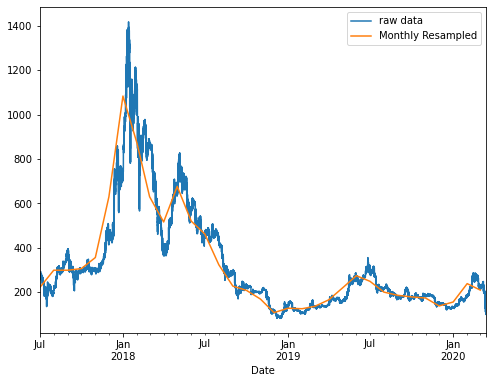

In [52]:
# Plot raw data with monthly resampled data

df.Close.plot(label='raw data')
df.resample('M').mean().Close.plot(label = 'Monthly Resampled')
plt.legend()

### Rolling Averages/Windows
Why use rolling average
* Rolling averages, also referred to as moving averages, are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.

In [55]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [56]:
# What is the rolling average of 4 hours?

df.rolling(4).mean()

,Close,Volume
Date,,
2017-07-01 11:00:00,NaN,NaN
2017-07-01 12:00:00,NaN,NaN
2017-07-01 13:00:00,NaN,NaN
2017-07-01 14:00:00,267.52,1554261.65
2017-07-01 15:00:00,270.44,1759492.57
...,...,...
2020-03-13 16:00:00,118.56,6289262.63
2020-03-13 17:00:00,127.29,4581942.13
2020-03-13 18:00:00,126.79,4873146.86


### What if I want to generate a rolling window function of weekly data from hourly data?

In [57]:
# Resampling and rolling average together

df.resample('W').mean().Close.rolling(4).mean()

Date
2017-07-02      NaN
2017-07-09      NaN
2017-07-16      NaN
2017-07-23   234.44
2017-07-30   218.21
              ...  
2020-02-16   201.10
2020-02-23   226.48
2020-03-01   241.13
2020-03-08   246.68
2020-03-15   226.96
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

In [58]:
# Resampling and rolling average together (26 weeks rolling average)

df.resample('W').mean().Close.rolling(26).mean()

Date
2017-07-02      NaN
2017-07-09      NaN
2017-07-16      NaN
2017-07-23      NaN
2017-07-30      NaN
              ...  
2020-02-16   172.29
2020-02-23   175.10
2020-03-01   177.40
2020-03-08   179.47
2020-03-15   179.28
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

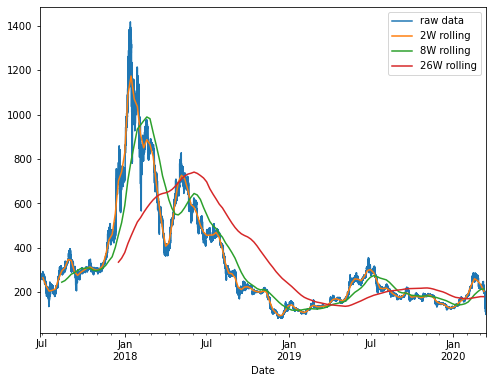

In [59]:
# %matplotlib notebook

df.Close.plot(label='raw data')
df.resample('W').mean().Close.rolling(2).mean().plot(label = '2W rolling')
df.resample('W').mean().Close.rolling(8).mean().plot(label = '8W rolling')
df.resample('W').mean().Close.rolling(26).mean().plot(label = '26W rolling')
plt.legend()